# Figure Generation Notebook - AS_events_per_gene

This notebook creates a single figure AS_events_per_gene

## Pre-requiste

This figure generation assumes `countGenesAndEvents.ipynb` has been run.  
Order of execution is as follows:

| Step | Program  | Description |
| - | - | -|
| 1 | https://github.com/lifebit-ai/rmats-nf | nextFlow pipeline used to generate `rmats_final` results |
| 2 | `differentialGeneExpressionAnalysis.ipynb` | Using GTEx V8 release data perform sex-biased differential analysis |
| 3 | `differentialSplicingGunctionAnalysis.ipynb` | Using both annotations from GTEx V8 and gencode.v30.annotation.gtf perform sex*as_event analysis |
| 4 | `countGenesAndEvents.ipynb` | Calculate summary information on both gene and alternative splicing |

It is assumed the steps 1-4 have been completed prior to executing this notebook.

## Figures (PDF files) created by this notebook
Output PDF Figures are written to the ``pdf/`` directory.

 **AS_events_per_gene.pdf**: Plot showing genes with the most common AS events across tissues.


In [1]:
library(ggplot2)
library(dplyr)
library(tidyverse)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  2.1.3     ✔ purrr   0.3.3
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

Warning message:
“package ‘readr’ was built under R version 3.6.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



**"../data/gene_as.tsv"** was generated by **countGenesAndEvents.ipynb**

In [2]:
filename <- "../data/gene_as.tsv"
gene_as <- read.table(filename, header=TRUE, sep="\t",
                               skipNul=FALSE, stringsAsFactors = FALSE)
head(gene_as,2)

,GeneJunction,ASE,ASE_IDX,Tissue,counts,Display,GeneSymbol,GeneID,chr,logFC,AveExpr,t,PValue,AdjPVal,B
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,XIST-2253,A3SS,2253,adipose_subcutaneous,4,Adipose (sc),XIST,ENSG00000229807.11,chrX,-4.408605,3.196317,-36.48897,4.635568e-154,3.893877e-150,310.0160
2,XIST-2252,A3SS,2252,adipose_subcutaneous,4,Adipose (sc),XIST,ENSG00000229807.11,chrX,-2.414713,3.647690,-21.92106,1.444102e-78,6.065229e-75,160.0282


### Figure for Genes with more than 10 alternative splicing events

In [3]:
# Colors for uniformity
# Let's use the following colors for uniformity
darkblue <- "#3c5488"
red <- "#e64b35"
nearlyblack <- "#040C04"
purple <- "#790079"
orange = "#ff9900"

In [4]:
res <- gene_as %>% 
       group_by(GeneSymbol) %>% 
       count(GeneSymbol) %>% 
       arrange(desc(n)) %>% 
       as.data.frame()
res$GeneSymbol <- factor(res$GeneSymbol, levels = res$GeneSymbol)
length(res$GeneSymbol)

#Add number of tissues
nTissues <- rep(NA, length(res))
for (i in 1:nrow(res)) {
  df_gene <- gene_as %>% filter(GeneSymbol == res$GeneSymbol[i])
  nTissues[i] <- length(unique(df_gene$Tissue))
}
res$Tissues <- nTissues
head(res)

sorted_res <- res
sorted_res$Tissues <- as.numeric(as.character(sorted_res$Tissues))
sorted_res <- res[order(-res$Tissues),]
sorted_res <- sorted_res[sorted_res$Tissues > 4, ]
drops <- c("n")
sorted_res <- sorted_res[ , !(names(sorted_res) %in% drops)]
sorted_res


[1] 2887

,GeneSymbol,n,Tissues
,<fct>,<int>,<int>
1,XIST,342,39
2,DDX3X,97,20
3,KDM5C,47,33
4,ZFX,47,27
5,KDM6A,27,24
6,UCA1,25,1


,GeneSymbol,Tissues
,<fct>,<int>
1,XIST,39
3,KDM5C,33
4,ZFX,27
5,KDM6A,24
2,DDX3X,20
12,PUDP,14
44,EIF1AX,10
57,PNPLA4,9
10,CES1,8


Saving 6.67 x 6.67 in image

Saved plot as ../pdf/AS_events_per_gene.pdf

Saved plot as ../pdf/as_events_per_gene.pdf



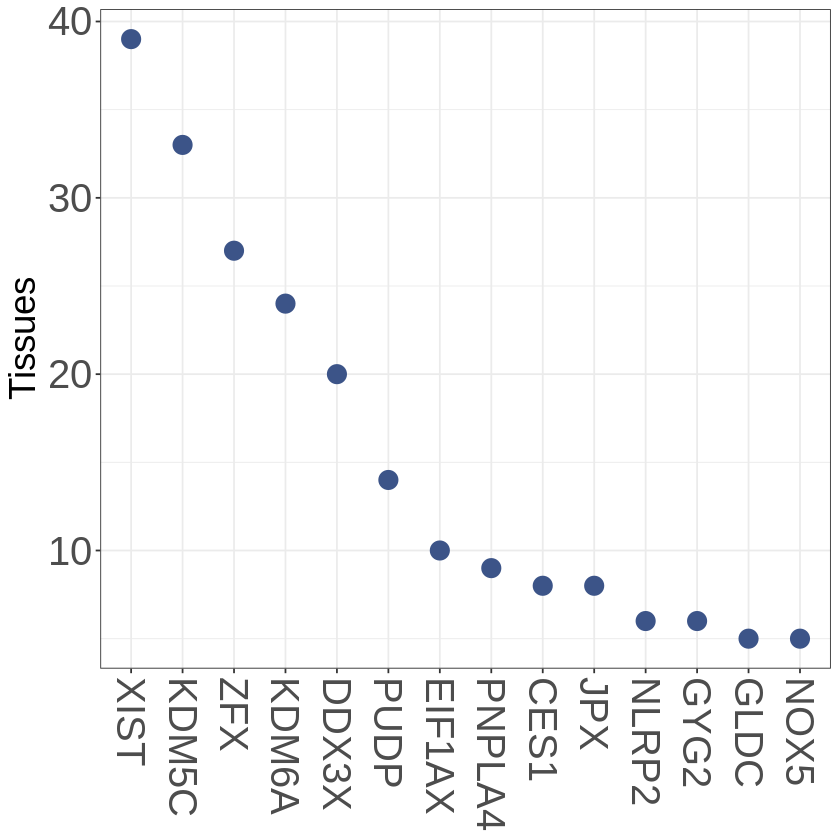

In [5]:
g <- ggplot(sorted_res, aes(x = reorder(GeneSymbol,-Tissues), y = Tissues)) +
  geom_point(colour = darkblue, size = 5) +
  theme_bw() +
  theme(axis.text.x = element_text(size=24, angle = 270, hjust = 0.0, vjust = 0.5),
        axis.text.y = element_text(size=24),
        axis.title.x = element_blank(),
        axis.title.y = element_text(face="plain", colour="black", size=22),
        legend.title=element_blank(),
        legend.position = "none" ) +
  ylab(paste("Tissues"))
ggsave("../pdf/AS_events_per_gene.pdf",g)
message("Saved plot as ../pdf/AS_events_per_gene.pdf")
g


### Appendix - Metadata

For replicability and reproducibility purposes, we also print the following metadata:

1. Checksums of **'artefacts'**, files generated during the analysis and stored in the folder directory **`data`**
2. List of environment metadata, dependencies, versions of libraries using `utils::sessionInfo()` and [`devtools::session_info()`](https://devtools.r-lib.org/reference/session_info.html)

### Appendix 1. Checksums with the sha256 algorithm

In [6]:
notebookid   = "create_as_events_per_gene"
notebookid


[1] "create_as_events_per_gene"

### Appendix 2. Libraries metadata

In [7]:
dev_session_info   <- devtools::session_info()
utils_session_info <- utils::sessionInfo()

message("Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..")
saveRDS(dev_session_info, file = paste0("../metadata/", notebookid, "_devtools_session_info.rds"))
message("Done!\n")

message("Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..")
saveRDS(utils_session_info, file = paste0("../metadata/", notebookid ,"_utils_info.rds"))
message("Done!\n")

dev_session_info$platform
dev_session_info$packages[dev_session_info$packages$attached==TRUE, ]

Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..

Done!


Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..

Done!




 setting  value                       
 version  R version 3.6.2 (2019-12-12)
 os       Ubuntu 18.04.3 LTS          
 system   x86_64, linux-gnu           
 ui       X11                         
 language en_US.UTF-8                 
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       Etc/UTC                     
 date     2020-06-22                  

,package,ondiskversion,loadedversion,path,loadedpath,attached,is_base,date,source,md5ok,library
,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<lgl>,<fct>
dplyr,dplyr,0.8.4,0.8.4,/opt/conda/lib/R/library/dplyr,/opt/conda/lib/R/library/dplyr,TRUE,FALSE,2020-01-31,CRAN (R 3.6.2),NA,/opt/conda/lib/R/library
forcats,forcats,0.4.0,0.4.0,/opt/conda/lib/R/library/forcats,/opt/conda/lib/R/library/forcats,TRUE,FALSE,2019-02-17,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
ggplot2,ggplot2,3.2.1,3.2.1,/opt/conda/lib/R/library/ggplot2,/opt/conda/lib/R/library/ggplot2,TRUE,FALSE,2019-08-10,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
purrr,purrr,0.3.3,0.3.3,/opt/conda/lib/R/library/purrr,/opt/conda/lib/R/library/purrr,TRUE,FALSE,2019-10-18,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
readr,readr,1.3.1,1.3.1,/opt/conda/lib/R/library/readr,/opt/conda/lib/R/library/readr,TRUE,FALSE,2018-12-21,CRAN (R 3.6.3),NA,/opt/conda/lib/R/library
stringr,stringr,1.4.0,1.4.0,/opt/conda/lib/R/library/stringr,/opt/conda/lib/R/library/stringr,TRUE,FALSE,2019-02-10,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
tibble,tibble,2.1.3,2.1.3,/opt/conda/lib/R/library/tibble,/opt/conda/lib/R/library/tibble,TRUE,FALSE,2019-06-06,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
tidyr,tidyr,1.0.2,1.0.2,/opt/conda/lib/R/library/tidyr,/opt/conda/lib/R/library/tidyr,TRUE,FALSE,2020-01-24,CRAN (R 3.6.2),NA,/opt/conda/lib/R/library
tidyverse,tidyverse,1.3.0,1.3.0,/opt/conda/lib/R/library/tidyverse,/opt/conda/lib/R/library/tidyverse,TRUE,FALSE,2019-11-21,CRAN (R 3.6.2),NA,/opt/conda/lib/R/library
